**Data:** <br>
https://www.kaggle.com/datasets/iamhungundji/dysarthria-detection 

**Task:**
1. Read data.csv in pandas
2. Visualize the waveplot, MFCC, and Mel Spectrogram for any 1 random sample of dysarthric male, dysarthric female, non-dysarthric male, and non-dysarthric female.
3. Comment on the output.
4. Define a function to create 256 MFCC features for any given audio file.
5. Apply the function on all audio files listed in data.csv
6. Split the data into training and validation by a ratio of 90:10.
7. Reshape the MFCC features for CNN.
8. Build the CNN model with padding on a training set.<br>
a. Include some dropout layers.<br>
b. Use metrics as recall score in compile function.<br>
c. Adam optimisers with different learning rates, beta1 and beta2. Select the best parameter based on your evaluation
9. Evaluate the validation set.
10. Calculate and comment on ROC AUC score, recall score and confusion matrix.

**Importing Neccasry Libraries**

In [7]:
import tensorflow as tf
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
from sklearn.model_selection import train_test_split
import IPython.display as ipd 

In [13]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'
!kaggle datasets download -d iamhungundji/dysarthria-detection
!unzip *.zip

 98% 153M/155M [00:06<00:00, 28.1MB/s]
100% 155M/155M [00:06<00:00, 24.8MB/s]
Archive:  dysarthria-detection.zip
  inflating: torgo_data/data.csv     
  inflating: torgo_data/dysarthria_female/F01_Session1_0001.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0002.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0004.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0006.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0007.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0008.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0013.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0015.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0017.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0018.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0021.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0022.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_00

**Reading Data**

In [8]:
data=pd.read_csv("data.csv")

In [9]:
data.head()

,is_dysarthria,gender,filename
0,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session2...
1,non_dysarthria,female,torgo_data/non_dysarthria_female/FC02_Session3...
2,non_dysarthria,female,torgo_data/non_dysarthria_female/FC02_Session3...
3,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session2...
4,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session1...


In [10]:
data['is_dysarthria'].value_counts()

non_dysarthria    1000
dysarthria        1000
Name: is_dysarthria, dtype: int64

**Visualizing the waveplot for any 1 random sample of dysarthric male, dysarthric female, non-dysarthric male, and non-dysarthric female.**

In [11]:
def get_waveplot(path, gender, is_dysarthria):
    x, sr = librosa.load(path)
    plt.figure(figsize=(20, 5))
    librosa.display.waveplot(x, sr=sr)
    plt.title('Waveplot of '+is_dysarthria+' '+gender)
    plt.show()

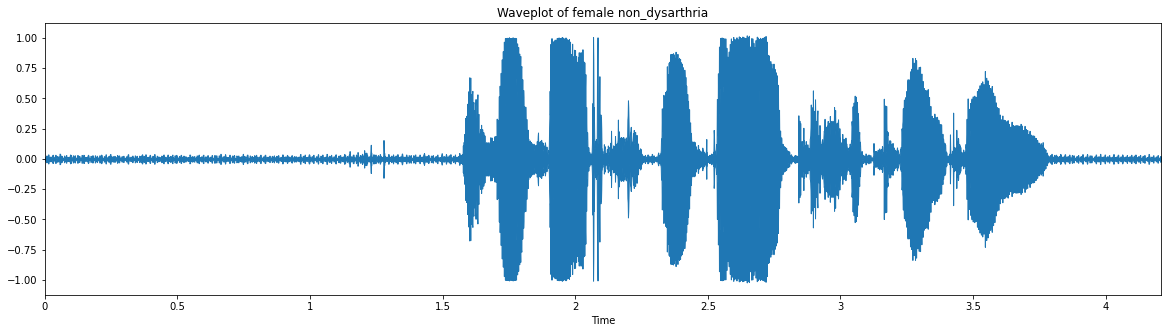

In [14]:
sample = data[(data['is_dysarthria']=='non_dysarthria') & (data['gender']=='female')]
get_waveplot(sample['filename'].values[0], sample['is_dysarthria'].values[0], 
             sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

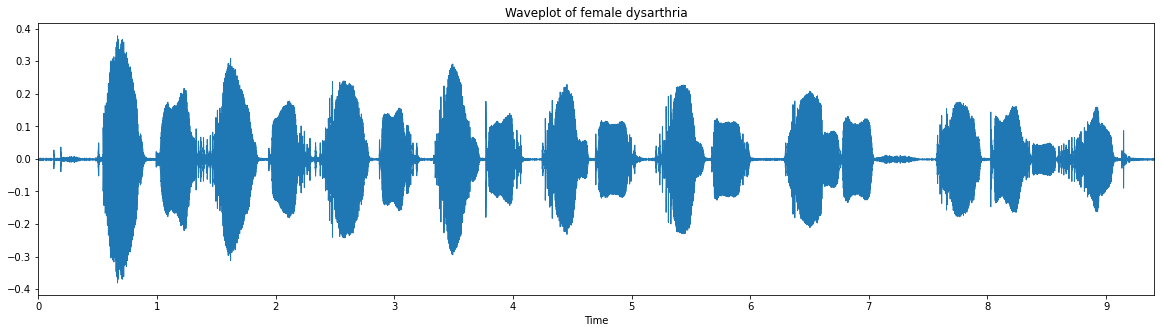

In [15]:
sample = data[(data['is_dysarthria']=='dysarthria') & (data['gender']=='female')]
get_waveplot(sample['filename'].values[0], sample['is_dysarthria'].values[0], 
             sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

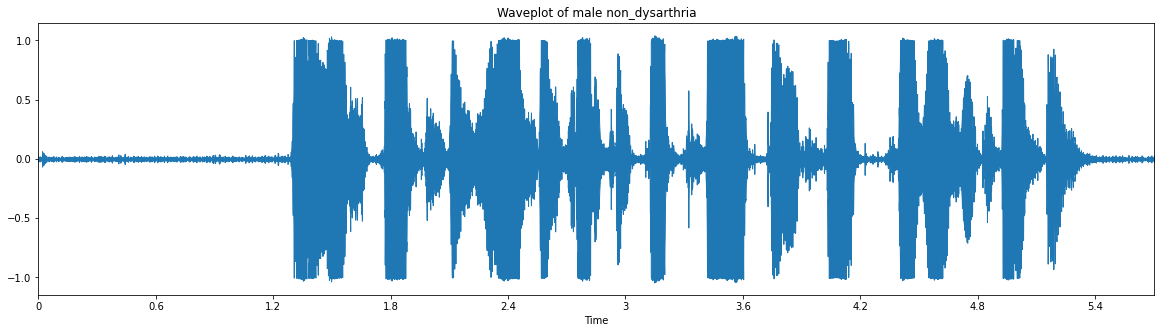

In [16]:
sample = data[(data['is_dysarthria']=='non_dysarthria') & (data['gender']=='male')]
get_waveplot(sample['filename'].values[0], sample['is_dysarthria'].values[0], 
             sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

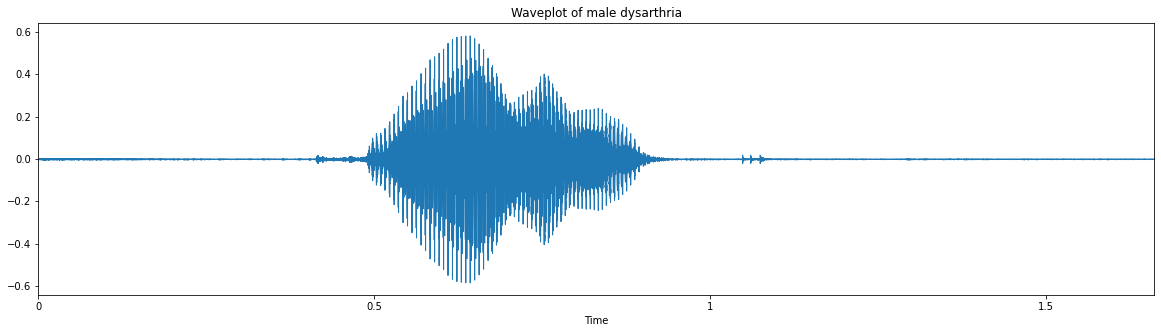

In [17]:
sample = data[(data['is_dysarthria']=='dysarthria') & (data['gender']=='male')]
get_waveplot(sample['filename'].values[0], sample['is_dysarthria'].values[0], 
             sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

**Visualizing the MFCC for any 1 random sample of dysarthric male, dysarthric female, non-dysarthric male, and non-dysarthric female.**

In [18]:
def get_mfcc(path, gender, is_dysarthria):
    x, sr = librosa.load(path)
    mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=20)
    print(mfccs.shape)
    plt.figure(figsize=(20, 5))
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.title('MFCC Spectral of '+is_dysarthria+' '+gender)
    plt.show()

(20, 182)


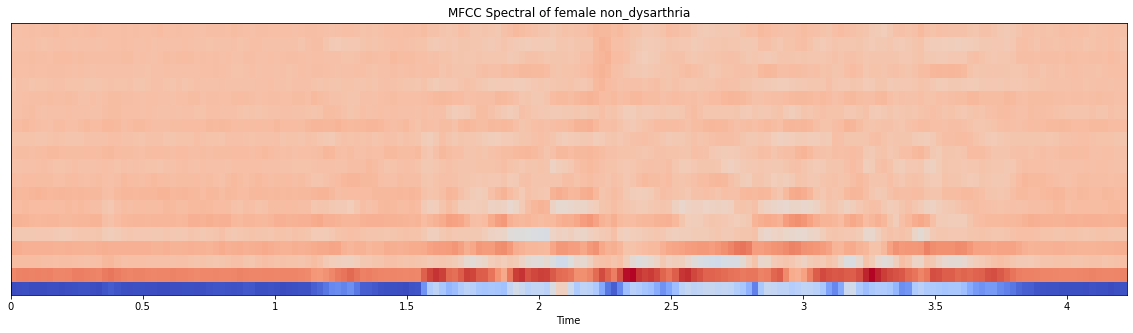

In [19]:
sample = data[(data['is_dysarthria']=='non_dysarthria') & (data['gender']=='female')]
get_mfcc(sample['filename'].values[0], sample['is_dysarthria'].values[0], 
             sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

(20, 406)


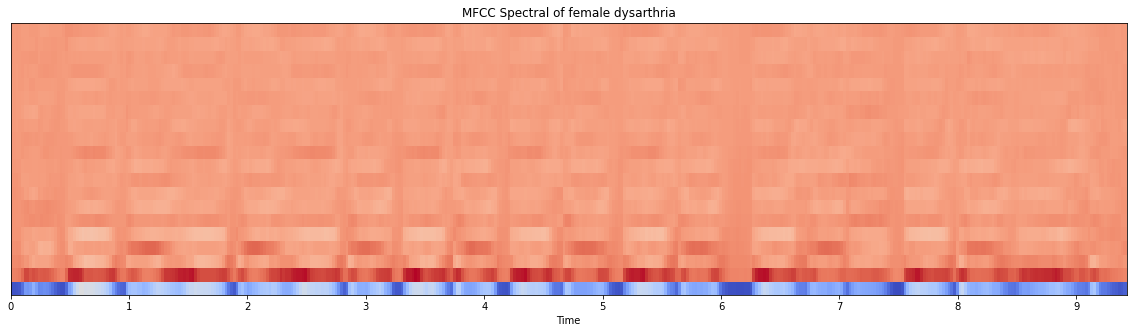

In [20]:
sample = data[(data['is_dysarthria']=='dysarthria') & (data['gender']=='female')]
get_mfcc(sample['filename'].values[0], sample['is_dysarthria'].values[0], 
             sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

(20, 246)


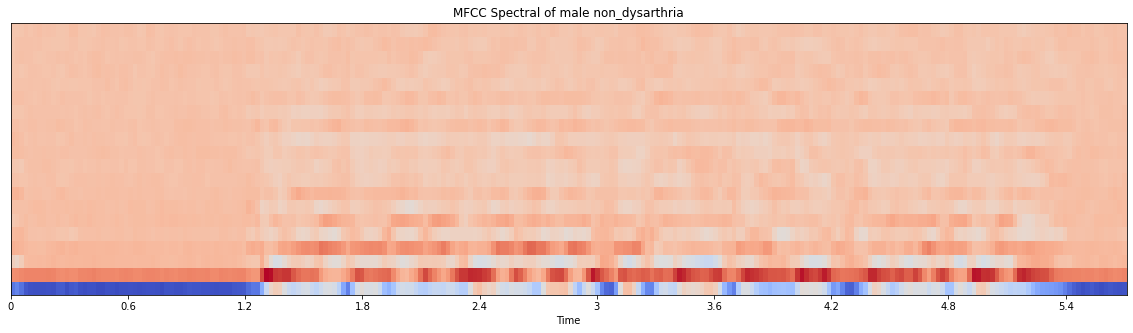

In [21]:
sample = data[(data['is_dysarthria']=='non_dysarthria') & (data['gender']=='male')]
get_mfcc(sample['filename'].values[0], sample['is_dysarthria'].values[0], 
             sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

(20, 72)


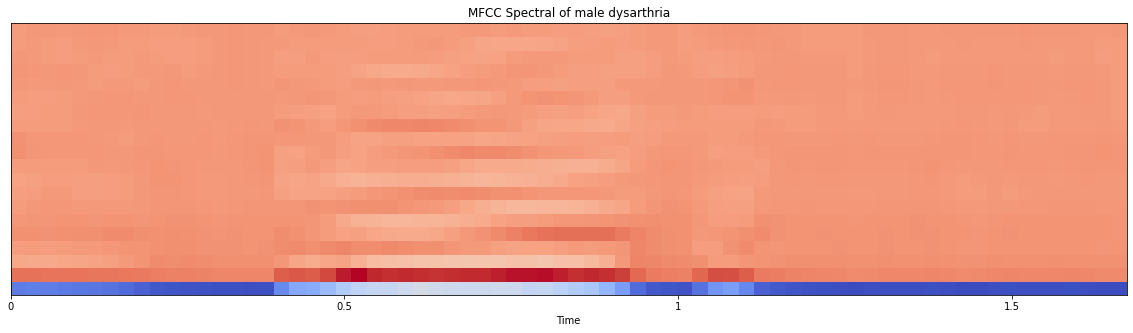

In [22]:
sample = data[(data['is_dysarthria']=='dysarthria') & (data['gender']=='male')]
get_mfcc(sample['filename'].values[0], sample['is_dysarthria'].values[0], 
             sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

**Visualizing the Mel Spectrogram for any 1 random sample of dysarthric male, dysarthric female, non-dysarthric male, and non-dysarthric female.**

In [23]:
def get_melspec(path, gender, is_dysarthria):
    x, sr = librosa.load(path)
    melspec = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128)
    print(melspec.shape)
    plt.figure(figsize=(20, 5))
    librosa.display.specshow(melspec, sr=sr, x_axis='time')
    plt.title('Mel Spectrogram of '+is_dysarthria+' '+gender)
    plt.show()

(128, 182)


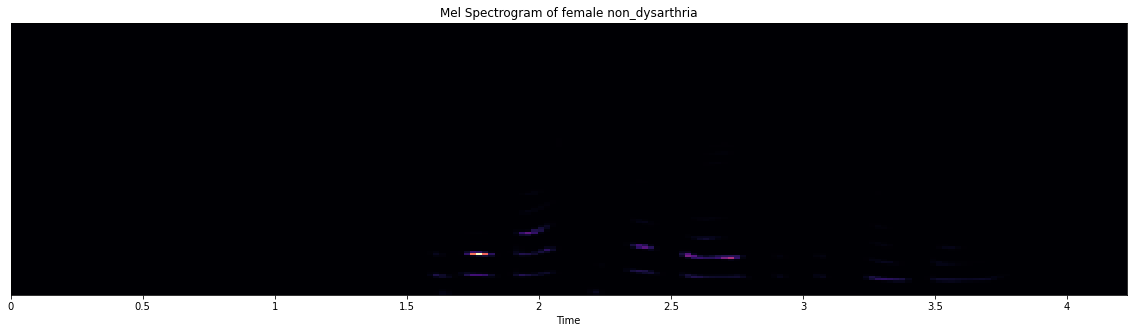

In [24]:
sample = data[(data['is_dysarthria']=='non_dysarthria') & (data['gender']=='female')]
get_melspec(sample['filename'].values[0], sample['is_dysarthria'].values[0], 
             sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

(128, 406)


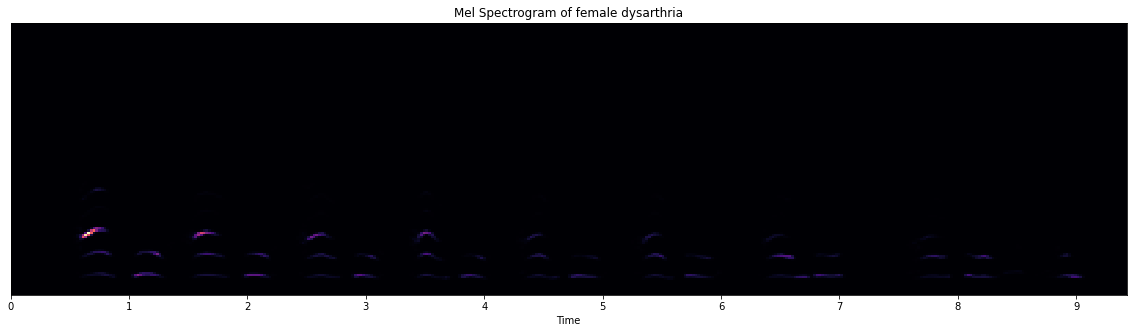

In [25]:
sample = data[(data['is_dysarthria']=='dysarthria') & (data['gender']=='female')]
get_melspec(sample['filename'].values[0], sample['is_dysarthria'].values[0], 
             sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

(128, 246)


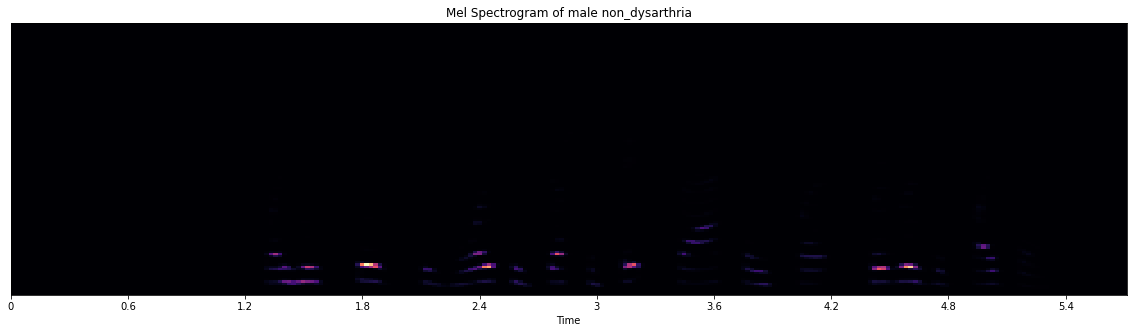

In [26]:
sample = data[(data['is_dysarthria']=='non_dysarthria') & (data['gender']=='male')]
get_melspec(sample['filename'].values[0], sample['is_dysarthria'].values[0], 
             sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

(128, 72)


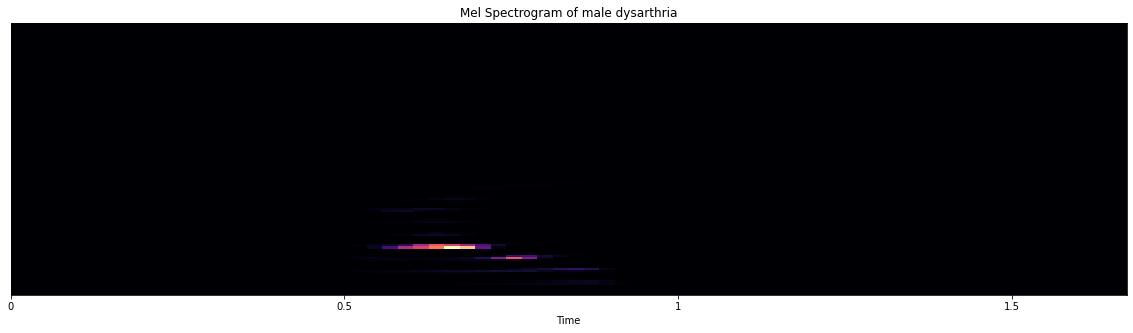

In [27]:
sample = data[(data['is_dysarthria']=='dysarthria') & (data['gender']=='male')]
get_melspec(sample['filename'].values[0], sample['is_dysarthria'].values[0], 
             sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

**Defining a function to create 256 MFCC features for any given audio file.**

In [28]:
def create_mfcc_features(path):
    mfccs = []
    try:
        x, sr = librosa.load(path, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=256)
        mfccs = np.mean(mfccs.T, axis=0)
    except:
        print('Error found in audio')
    return mfccs

**Applying the function on all audio files listed in data.csv**

In [29]:
%%time
X_df = pd.DataFrame(data['filename'].apply(lambda x: create_mfcc_features(x)).tolist())

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Error found in audio


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=209
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=583
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=581
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=185
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=946
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=214
  n_fft, y.shape[-1]


CPU times: user 1min 25s, sys: 1min 6s, total: 2min 32s
Wall time: 1min 19s


In [30]:
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-224.202225,104.766289,-19.249100,39.976105,-13.658643,19.425083,-3.005526,7.105515,5.549227,-4.107284,...,1.382414,0.946646,0.779773,1.034225,0.417392,0.073569,0.560806,0.604964,0.170649,-0.222621
1,-301.802734,113.472832,-19.863441,40.374279,-16.921591,21.515228,4.499708,15.208834,7.142713,1.031963,...,1.247081,1.180266,1.058408,1.241004,0.026150,-1.417642,0.081231,0.036446,0.018918,-0.752195
2,-305.652679,116.443367,-27.130651,46.842144,-22.617197,24.739267,3.893429,14.112663,8.798301,0.695419,...,0.969411,0.873021,0.453568,1.044326,-0.004185,-1.480199,0.273740,0.217892,-0.205967,-0.590402
3,-214.418564,121.380379,-38.858505,39.850506,-27.386419,23.892429,-4.153133,8.637264,4.428192,-0.624779,...,1.117963,0.611449,0.945472,0.702243,0.212583,-0.102357,0.021461,0.346264,-0.056452,-0.267683
4,-283.125305,108.704826,-20.648291,46.923939,-15.770267,26.458565,-0.413044,12.762578,9.015738,-2.466657,...,1.457438,1.600919,0.916394,0.728466,0.549834,-0.164512,0.135451,-0.277304,-0.432144,-0.468542


In [31]:
encoder = LabelEncoder()
encoder.fit(data['is_dysarthria'])
y = encoder.transform(data['is_dysarthria'])

In [32]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [33]:
df_post_process=pd.concat([pd.DataFrame(X_df), pd.DataFrame(y)], axis=1)

In [34]:
df_post_process=df_post_process.dropna()

In [35]:
x_df=df_post_process.iloc[:,:-1]

In [36]:
y=df_post_process.iloc[:,-1:]

**Spliting the data into training and validation by a ratio of 90:10.**

In [38]:
x_train, x_val, y_train, y_val = train_test_split(np.array(x_df), y, test_size=0.1)

In [39]:
x_train.shape, x_val.shape

((1799, 128), (200, 128))

**Reshaping the MFCC features for CNN.**

In [40]:
x_train = x_train.reshape(x_train.shape[0], 16, 8, 1)
x_val = x_val.reshape(x_val.shape[0], 16, 8, 1)

In [41]:
len(data['is_dysarthria'].unique())

2

**Model Bulding**

In [47]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(16, 8, 1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 8, 16)         160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 4, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 4, 8)           1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 2, 8)          0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 4, 2, 8)           0         
                                                                 
 flatten (Flatten)           (None, 64)                0

In [64]:
from tensorflow import keras
Adam = keras.optimizers.Adam(learning_rate=0.0001,beta_1=0.9,beta_2=0.99)
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Recall()])

In [65]:
x_train.shape, y_train.shape

((1799, 16, 8, 1), (1799, 1))

In [66]:
history = model.fit(x_train, y_train, epochs=25)

Epoch 1/25
57/57 [==============================] - 1s 4ms/step - loss: 0.1509 - accuracy: 0.9427 - recall_4: 0.9376
Epoch 2/25
57/57 [==============================] - 0s 4ms/step - loss: 0.1457 - accuracy: 0.9494 - recall_4: 0.9510
Epoch 3/25
57/57 [==============================] - 0s 4ms/step - loss: 0.1212 - accuracy: 0.9566 - recall_4: 0.9532
Epoch 4/25
57/57 [==============================] - 0s 4ms/step - loss: 0.0959 - accuracy: 0.9616 - recall_4: 0.9532
Epoch 5/25
57/57 [==============================] - 0s 4ms/step - loss: 0.1204 - accuracy: 0.9544 - recall_4: 0.9443
Epoch 6/25
57/57 [==============================] - 0s 4ms/step - loss: 0.1335 - accuracy: 0.9500 - recall_4: 0.9399
Epoch 7/25
57/57 [==============================] - 0s 4ms/step - loss: 0.1202 - accuracy: 0.9561 - recall_4: 0.9521
Epoch 8/25
57/57 [==============================] - 0s 4ms/step - loss: 0.1189 - accuracy: 0.9522 - recall_4: 0.9488
Epoch 9/25
57/57 [==============================] - 0s 4ms/step 

In [74]:
Adam = keras.optimizers.Adam(learning_rate=0.0025,beta_1=0.8,beta_2=0.95)
model.compile(optimizer=Adam, loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Recall()])

In [75]:
history = model.fit(x_train, y_train, epochs=25)

Epoch 1/25
57/57 [==============================] - 1s 4ms/step - loss: 0.1258 - accuracy: 0.9494 - recall_6: 0.9421
Epoch 2/25
57/57 [==============================] - 0s 4ms/step - loss: 0.1405 - accuracy: 0.9411 - recall_6: 0.9365
Epoch 3/25
57/57 [==============================] - 0s 4ms/step - loss: 0.1766 - accuracy: 0.9405 - recall_6: 0.9410
Epoch 4/25
57/57 [==============================] - 0s 4ms/step - loss: 0.1592 - accuracy: 0.9405 - recall_6: 0.9254
Epoch 5/25
57/57 [==============================] - 0s 4ms/step - loss: 0.0979 - accuracy: 0.9583 - recall_6: 0.9521
Epoch 6/25
57/57 [==============================] - 0s 4ms/step - loss: 0.1300 - accuracy: 0.9578 - recall_6: 0.9510
Epoch 7/25
57/57 [==============================] - 0s 4ms/step - loss: 0.1316 - accuracy: 0.9472 - recall_6: 0.9399
Epoch 8/25
57/57 [==============================] - 0s 4ms/step - loss: 0.1316 - accuracy: 0.9544 - recall_6: 0.9477
Epoch 9/25
57/57 [==============================] - 0s 4ms/step 

In [67]:
prob_val = model.predict(x_val)

**Evaluating the validation set**

In [68]:
prob_val

array([[9.93794560e-01],
       [2.99015522e-01],
       [7.70178445e-08],
       [9.99877214e-01],
       [1.16371003e-03],
       [9.31178093e-01],
       [4.10639606e-02],
       [9.99629498e-01],
       [5.21438010e-02],
       [5.85608650e-04],
       [6.02257391e-03],
       [7.60426641e-01],
       [9.99745876e-02],
       [9.98745680e-01],
       [6.28319442e-01],
       [3.14908384e-08],
       [2.24636123e-03],
       [5.42220660e-04],
       [1.08925427e-07],
       [9.99999881e-01],
       [6.69200790e-06],
       [2.64103478e-03],
       [4.22210142e-04],
       [9.80350673e-01],
       [9.97614980e-01],
       [6.23881700e-04],
       [9.98263299e-01],
       [9.90395129e-01],
       [9.99993443e-01],
       [1.84910081e-03],
       [3.02046966e-02],
       [5.19465402e-06],
       [9.95531023e-01],
       [2.27768879e-07],
       [5.57879801e-04],
       [2.78026005e-03],
       [3.47383553e-03],
       [2.53593735e-03],
       [2.37912303e-04],
       [9.95214224e-01],


**Confusion Matrix**

In [69]:
confusion_matrix(y_val, np.round(prob_val))

array([[ 97,   1],
       [  2, 100]])

**AUC-ROC Curve Score**

In [70]:
from sklearn.metrics import roc_auc_score, recall_score
roc_auc_score(y_val, model.predict(x_val))

0.9991996798719487

**Recall Score**

In [71]:
print(recall_score(y_val,  np.round(prob_val)))

0.9803921568627451
